In [6]:
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt


predictions_df = pd.read_csv("predictions.csv")
predictions_df

,img_path,pred_x,pred_y,true_x,true_y,distance
0,Dataset/1765029915013.jpg,0.399156,0.816997,0.744374,0.032712,0.856901
1,Dataset/1765029952588.jpg,0.187825,0.767022,0.260029,0.046557,0.724073
2,Dataset/1765029952337.jpg,0.236803,0.748978,0.293053,0.050019,0.701219
3,Dataset/1765029948231.jpg,0.178026,0.700354,0.825832,0.887676,0.674346
4,Dataset/1765029952082.jpg,0.333211,0.757993,0.326076,0.101940,0.656092
...,...,...,...,...,...,...
6334,Dataset/1755881806243.jpg,0.395481,0.254577,0.399720,0.255233,0.004289
6335,Dataset/1757518989162.jpg,0.341583,0.162294,0.338778,0.159139,0.004222
6336,Dataset/1755730922222.jpg,0.110248,0.751278,0.110714,0.747537,0.003770
6337,Dataset/1755777822788.jpg,0.050992,0.380315,0.052605,0.383436,0.003513


In [7]:
def display_image_with_preds(idx):
    row = predictions_df.iloc[idx]
    img_path = row['img_path']
    pred_x, pred_y = row['pred_x'], row['pred_y']
    true_x, true_y = row['true_x'], row['true_y']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show image on the left
    img = plt.imread(img_path)
    axs[0].imshow(img)
    axs[0].set_title(f"Image: {img_path.split('/')[-1]}")
    axs[0].axis('off')

    # Show prediction and ground truth on the right
    axs[1].plot(1 - pred_x, 1 - pred_y, 'ro', label='Prediction', markersize=10)
    axs[1].plot(1 - true_x, 1 - true_y, 'go', label='Ground Truth', markersize=10)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xticks([0, 1])
    axs[1].set_yticks([0, 1])
    axs[1].set_title(f"Pred (red): ({pred_x:.2f}, {pred_y:.2f})\nTrue (green): ({true_x:.2f}, {true_y:.2f})")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    return img_path

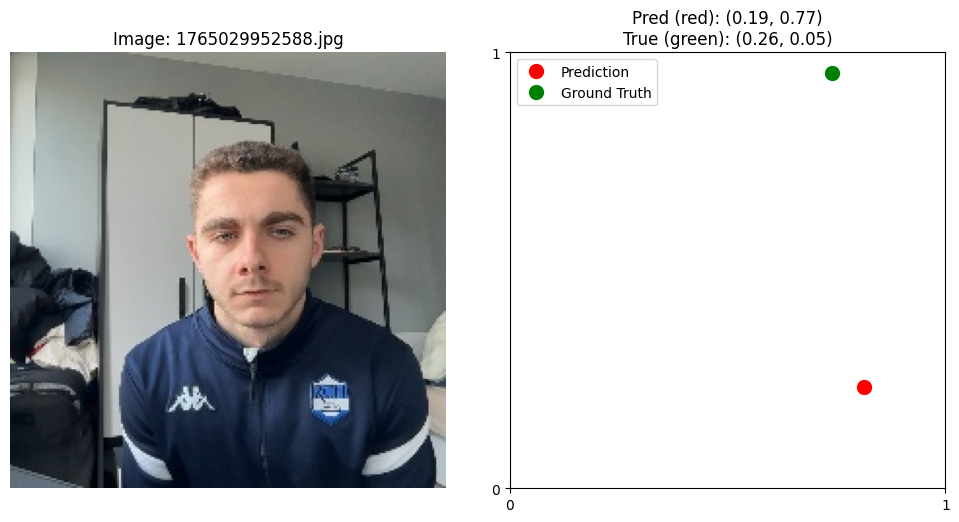

In [8]:
images_to_delete = []

idx = 0
while True:
    img_path = display_image_with_preds(idx)

    choice = input("d (delete) / s (skip) / q (quit)")
    if choice == "d":
        images_to_delete.append(img_path)
    elif choice == "q":
        break

    idx += 1
    
    # Nettoyer l'affichage précédent
    clear_output(wait=True)

In [9]:
print('images_to_delete', images_to_delete)

images_to_delete ['Dataset/1765029915013.jpg']


In [10]:
dataset_df = pd.read_csv('dataset.csv')
print('Length of dataset_df', len(dataset_df))

dataset_df[dataset_df['img_filename'].isin(images_to_delete)]
filtered_dataset_df = dataset_df[~dataset_df['img_filename'].isin(images_to_delete)]

filtered_dataset_df.to_csv('dataset_fixed.csv', index=False)
print('Length of filtered_dataset_df', len(filtered_dataset_df))


Length of dataset_df 6254
Length of filtered_dataset_df 6253
